# Lecture8　パターン認識2
<div dir='rtl'>
2022.4岩政
</div>

## クラスタリング

## kMeans(K平均法)
#### make_blobsを用いたクラスタリング（教師なし）
kMeans http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html<br>
make_blobs() サンプルデータの生成　sklearn.datasets.make_blobs<br>
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [14]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import  accuracy_score, classification_report

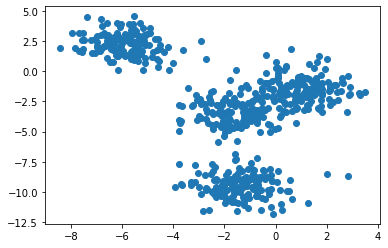

In [15]:
X, y = make_blobs(  #今回，目的変数（教師データ）yは用いない
    n_samples=600,  # サンプル数
    n_features=2,    # データ（説明変数）の特徴量の種類
    centers=4,       # データのグループ数
    cluster_std=1.0, # データのばらつきの標準偏差
    random_state=2)  # 確率変数の再現性を設定
X_train = X
y_train = y
plt.scatter(X_train[:,0], X_train[:,1])


散布図を見ると3つのグループ（クラスタ）に見えるので，クラスタを3つとして分類

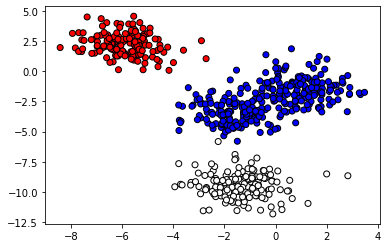

In [16]:
kmeans = KMeans(n_clusters=3)
y_train_est = kmeans.fit_predict(X_train)
#print(y_train_est[0:20])
plt.scatter(X_train[:,0], X_train[:,1], c=y_train_est, cmap=cm.bwr, edgecolors='k')


クラスタを4つとして分類

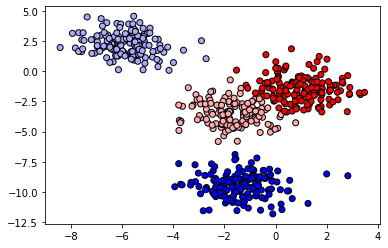

In [17]:
kmeans = KMeans(n_clusters=4)
cluster = kmeans.fit(X_train)
y_train_est = kmeans.predict(X_train)
#print(y_train_est[0:20])
plt.scatter(X_train[:,0], X_train[:,1], c=y_train_est, cmap=cm.bwr, edgecolors='k')


上記の2つの結果を見て，クラスタ数が３または４なのか，どちらが正しいかは不明としか言いようがない。

あまり意味はないが，クラスタ数が真のそれと一致しているとき，クラスタ器の性能評価を行ってみる。
ただし，評価は難しい。理由は，y_train_estに与えられるクラスタ番号の順序が一定していないので，
y_trainのクラスタ番号に順に合わせる必要がある。
そのため，上記まで実行したら，スクリプトはこれ以降のみを扱い，眼で見て修正を行う。
あまり意味はないが，クラスタ数が真のそれと一致しているとき，クラスタ器の性能評価を行ってみる。
ただし，評価は難しい。理由は，y_train_estに与えられるクラスタ番号の順序が一定していないので，
y_trainのクラスタ番号に順に合わせる必要がある。
そのため，上記まで実行したら，スクリプトはこれ以降のみを扱い，眼で見て修正を行う

In [18]:
print('accuracy =%f ' % accuracy_score(y_train, y_train_est))
print(classification_report(y_train, y_train_est))

accuracy =0.488333 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       0.00      0.00      0.00       150
           2       0.98      0.95      0.97       150
           3       0.00      0.00      0.00       150

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.49      0.49      0.49       600



## K平均法を回帰に使う、ボストン
https://qiita.com/fujin/items/128ed7188f7e7df74f2c#%E5%88%86%E9%A1%9E%E4%BA%88%E6%B8%AC%E7%B2%BE%E5%BA%A6

In [19]:
# ボストン住宅価格データセット
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

boston = datasets.load_boston()

# 説明変数
X = boston.data
# 目的変数
Y = boston.target

C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

In [20]:
# データ表示（特徴量）
print("データ数 = %d  特徴量 = %d" % (X.shape[0], X.shape[1]))
pd.DataFrame(X, columns=boston.feature_names).head()

データ数 = 506  特徴量 = 13


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
# データ表示（目的変数）
print("データ数 = %d" % (Y.shape[0]))
print(Y[:10]) # 先頭 10件表示

データ数 = 506
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


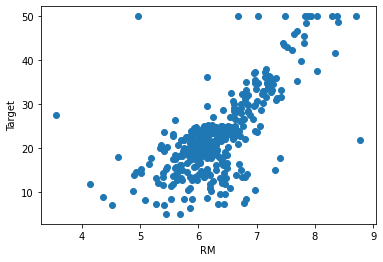

In [22]:
# 説明変数に部屋数のみ使用
X = boston.data[:, [5]] # 部屋数

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

# プロット
plt.xlabel("RM")
plt.ylabel("Target")
plt.plot(X_train, Y_train, "o")


[1] MAE = 6.04,  RMSE = 8.69,  score = 0.07
[2] MAE = 4.70,  RMSE = 6.82,  score = 0.43
[3] MAE = 4.47,  RMSE = 6.54,  score = 0.48
[4] MAE = 4.53,  RMSE = 6.47,  score = 0.49
[5] MAE = 4.29,  RMSE = 6.28,  score = 0.52
[6] MAE = 4.30,  RMSE = 6.22,  score = 0.53
[7] MAE = 4.31,  RMSE = 6.19,  score = 0.53
[8] MAE = 4.33,  RMSE = 6.24,  score = 0.52
[9] MAE = 4.33,  RMSE = 6.21,  score = 0.53
[10] MAE = 4.30,  RMSE = 6.20,  score = 0.53
[11] MAE = 4.30,  RMSE = 6.18,  score = 0.53
[12] MAE = 4.25,  RMSE = 6.17,  score = 0.53
[13] MAE = 4.30,  RMSE = 6.19,  score = 0.53
[14] MAE = 4.22,  RMSE = 6.13,  score = 0.54
[15] MAE = 4.22,  RMSE = 6.15,  score = 0.54
[16] MAE = 4.22,  RMSE = 6.16,  score = 0.54
[17] MAE = 4.21,  RMSE = 6.15,  score = 0.54
[18] MAE = 4.16,  RMSE = 6.09,  score = 0.55
[19] MAE = 4.20,  RMSE = 6.15,  score = 0.54
[20] MAE = 4.22,  RMSE = 6.21,  score = 0.53


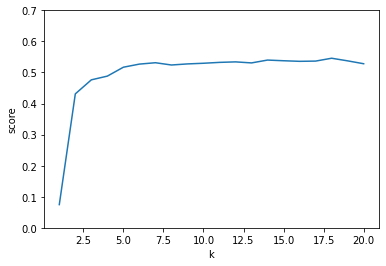

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

list_k = []
list_score = []
for k in range(1, 21):
  # KNeighborsClassifier
  knr = KNeighborsRegressor(n_neighbors=k)
  knr.fit(X_train, Y_train)

  # 予測　
  Y_pred = knr.predict(X_test)

  #
  # 評価
  #
  # 平均絶対誤差(MAE)
  mae = mean_absolute_error(Y_test, Y_pred)
  # 平方根平均二乗誤差（RMSE）
  rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))  
  # スコア R^2
  score = knr.score(X_test, Y_test)

  print("[%d] MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (k, mae, rmse, score))

  list_k.append(k)
  list_score.append(score)

# プロット
plt.ylim(0, 0.7)
plt.xlabel("k")
plt.ylabel("score")
plt.plot(list_k, list_score)

```
・平均絶対誤差(MAE)
正解値と予測値の差分の絶対値を平均したもの
・平方根平均二乗誤差（RMSE）
正解値と予測値の差分の二乗を平均し、平方したもの
```

K = 6 以降、ほとんど変化がありません。
K 値は 6 で良いようです

In [25]:
knr = KNeighborsRegressor(n_neighbors=6)
knr.fit(X_train, Y_train)

# 予測　
list_pred = knr.predict(X_test)

In [26]:
len(list_pred),len(X_test)

(127, 127)

テストデータの部屋数を使った住宅価格の予測値をプロットしてみます。
青が実際の価格、赤が予測価格になります。

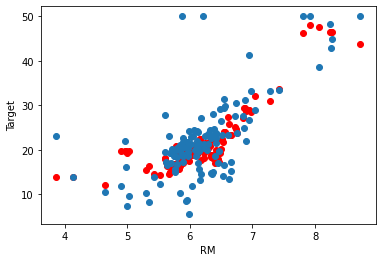

In [27]:
# テストデータ上での正解値（青）と予測値（赤）をプロット
#K6_Pred = np.array(list_pred)[5]

K6_Pred= list_pred
plt.xlabel("RM")
plt.ylabel("Target")
plt.plot(X_test, K6_Pred, "ro")
plt.plot(X_test, Y_test, "o")

## 凝集型の階層クラスタリング

In [28]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.cluster import hierarchy


In [29]:
data = np.array([[2,1], [1,1], [1,4], [2,5], [4,4]])

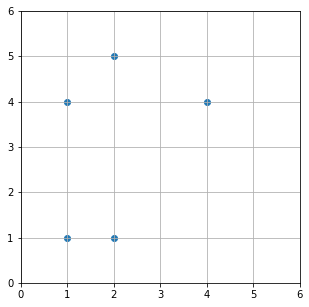

In [30]:
fig = plt.subplots(figsize=(5,5))
plt.xlim(0,6)
plt.ylim(0,6)
plt.grid()
plt.scatter(data[:,0], data[:,1])

scipy.cluster.hierarchy.linkage<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
scipy.cluster.hierarchy.dendrogram<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

群平均法：method='average'

In [31]:
result_ave = hierarchy.linkage(data, method='average')
print(result_ave)

[[0.         1.         1.         2.        ]
 [2.         3.         1.41421356 2.        ]
 [4.         6.         2.61803399 3.        ]
 [5.         7.         3.68892921 5.        ]]


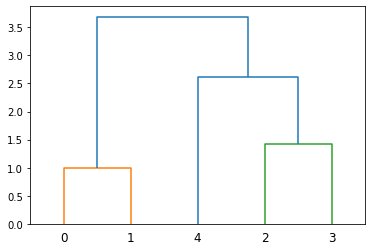

In [32]:
var = hierarchy.dendrogram(result_ave)


Ward法：method='ward'

In [33]:
result_ward = hierarchy.linkage(data, 'ward')
print(result_ward)

[[0.         1.         1.         2.        ]
 [2.         3.         1.41421356 2.        ]
 [4.         6.         2.94392029 3.        ]
 [5.         7.         5.32290647 5.        ]]


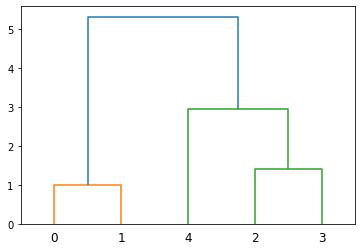

In [34]:
var = hierarchy.dendrogram(result_ward)


#### 富山県の市町村別人口動態
人口移動調査　http://www.pref.toyama.jp/sections/1015/lib/jinko/　の中にある。<br>
オリジナルデータは次：url = 'http://www.pref.toyama.jp/sections/1015/lib/jinko/_dat_h29/jinko_dat005.xls'<br>
これをローカルフォルダに保存して，これを読込んで使用。

In [35]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.cluster import hierarchy


In [36]:
url = 'http://www.pref.toyama.jp/sections/1015/lib/jinko/_dat_h29/jinko_dat005.xls'
#url = 'datasets/jinko_dat005.xls'
data_orig = pd.read_excel(url, header=None)

In [37]:
#データのフォーマットを見て，必要，不必要な行，列を判別する
data = data_orig.drop([0,1,2,3,4],axis=0)
# drop=True: indexの降り直し,  inplace=True: 書き換えは自身のメモリで行う
data.reset_index(drop=True, inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,富 山 市,-567,-1584,3167,4751,1017,12301,3217,9084,11284,2789,8495,富 山 市
1,高 岡 市,-1065,-1085,1176,2261,20,4779,2059,2720,4759,1837,2922,高 岡 市
2,魚 津 市,-456,-252,273,525,-204,1077,532,545,1281,667,614,魚 津 市
3,氷 見 市,-737,-522,228,750,-215,845,405,440,1060,595,465,氷 見 市
4,滑 川 市,-58,-150,233,383,92,1063,674,389,971,568,403,滑 川 市


上記を見て，市の名前（カラム0），自然増加（カラム2），転入総数（カラム6），転出総数（カラム9）を用いることとし，これをDataFrame dfに結合する

In [38]:
df = pd.concat([data.iloc[:,0], data.iloc[0:,2], data.iloc[0:,6], data.iloc[0:,9]], axis=1)
df.head()

,0,2,6,9
0,富 山 市,-1584,12301,11284
1,高 岡 市,-1085,4779,4759
2,魚 津 市,-252,1077,1281
3,氷 見 市,-522,845,1060
4,滑 川 市,-150,1063,971


In [39]:
#dfの各列にラベルを与える, city:市の名前，natural:自然増加, in:転入総数，out:転出総
df.columns = ['city', 'natural', 'in', 'out']
df.head()

,city,natural,in,out
0,富 山 市,-1584,12301,11284
1,高 岡 市,-1085,4779,4759
2,魚 津 市,-252,1077,1281
3,氷 見 市,-522,845,1060
4,滑 川 市,-150,1063,971


相関図（横軸：自然増加，縦軸：転入総数）をプロットする。このとき，各点に市の名前を付加する

In [40]:
names = df.city
city_labels = list(names) # dendrogramへの入力はリスト形式

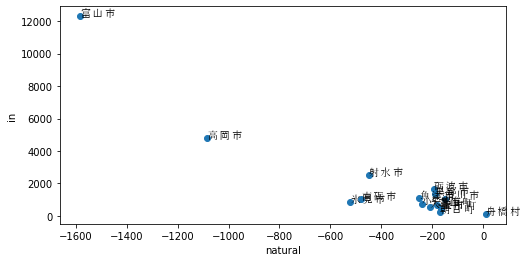

In [41]:
fig = plt.subplots(figsize=(8,4)) # (22,18)
plt.rcParams['font.family'] ='Yu Mincho' # 日本語フォントを使うため
plt.xlabel('natural')
plt.ylabel('in')
plt.scatter(df['natural'], df['in'])
for i, text in enumerate(df.city):
    plt.annotate(text, xy=(df['natural'][i], df['in'][i]), size=10 )


df2 は，クラスタ分析のために，cityを削除したデータフレームであ

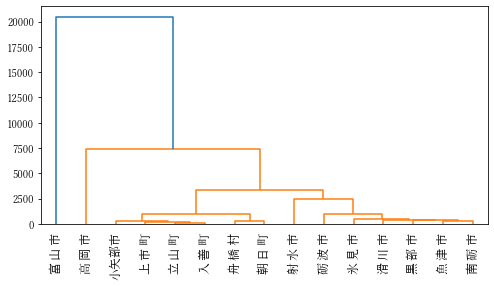

In [42]:
fig = plt.subplots(figsize=(8,4))
df2 = df.drop('city',axis=1)
Z = hierarchy.linkage(df2, 'ward')
dn = hierarchy.dendrogram(Z, labels=city_labels, leaf_rotation=90.)


#### 相関図
念のため，各変数同士の相関図を見る。<br>
seabornのプロットは，バージョン0.9.0から，この例のようなデータセットの種類の数に応じた色数を明示的に用意することが求められる。<br>
そうでないと，次のエラーが現れる "ValueError: color kwarg must have one color per dataset"<br>
ここでは，簡単に，hue='out'と指定した。ここに，'out'はdfのラベル名。幾つかのWarningが現れるが，気にしないことにする。

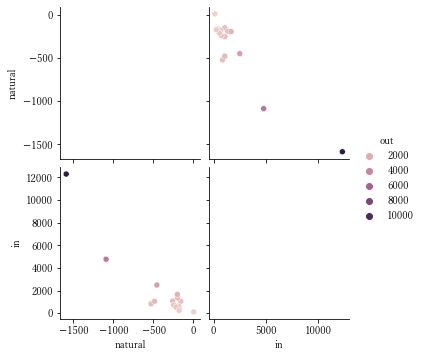

In [43]:
sns.pairplot(df, hue='out')


上記の結果を見て，in, outに強い相関が有ることが認められる。naturalと（in, out）にも負の相関が認められるが，若干，外れる市町村があり，この原因究明も興味深い調査となるであろう。

## 主成分分析

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

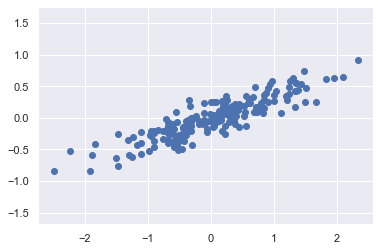

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

NameError: name 'X' is not defined

In [5]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [6]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


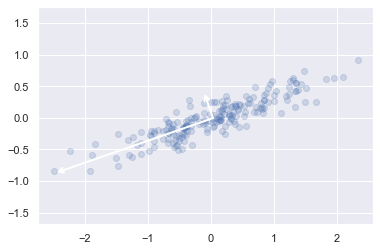

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

### PCA as dimensionality reduction

In [8]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


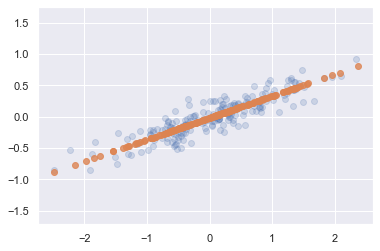

In [9]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

### PCA for visualization: Hand-written digits

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [6]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [12]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


C:\Users\miwam\AppData\Local\Temp\ipykernel_22468\2175666399.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


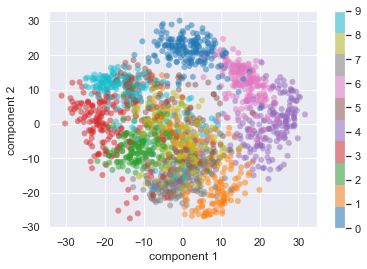

In [13]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

C:\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


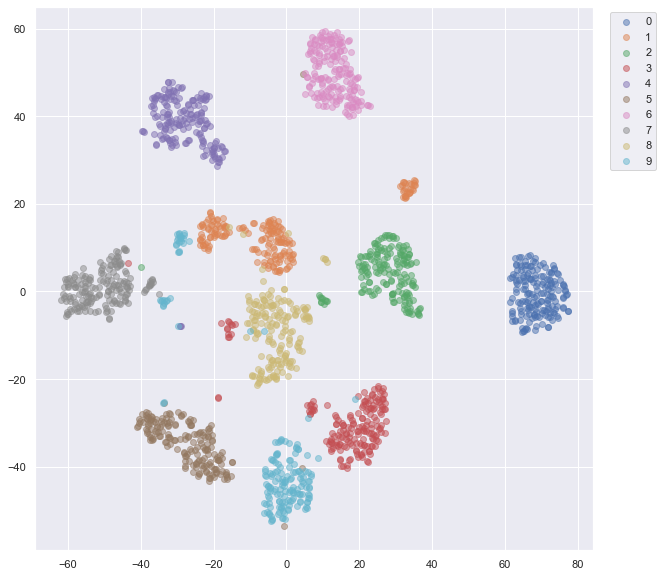

In [16]:

from sklearn.manifold import TSNE
import sklearn.datasets

digits, label = sklearn.datasets.load_digits(return_X_y=True)
digits = digits / 255
digits2d = TSNE(n_components=2).fit_transform(digits)

from matplotlib import pylab as plt

f, ax = plt.subplots(1, 1, figsize=(10, 10))
for i in range(10):
    target = digits2d[label == i]
    ax.scatter(x=target[:, 0], y=target[:, 1], label=str(i), alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

## ガウス混合分布

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [19]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

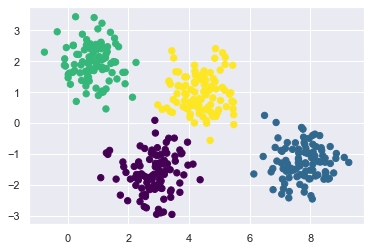

In [20]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [21]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

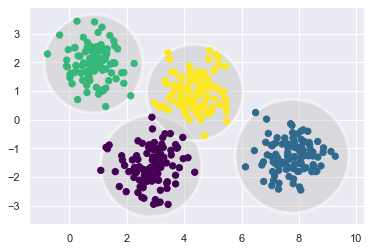

In [22]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

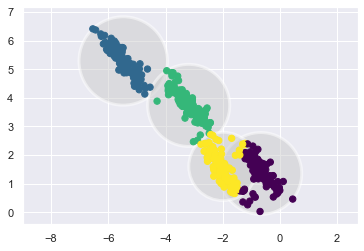

In [23]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

#### Generalizing E–M: Gaussian Mixture Models

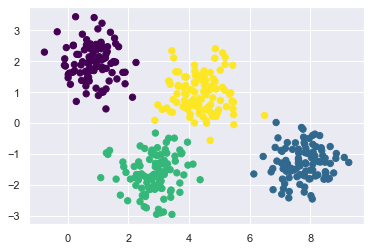

In [25]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [26]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.463 0.    0.537]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]]


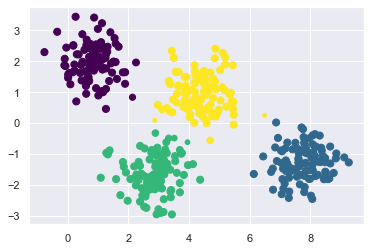

In [27]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [28]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

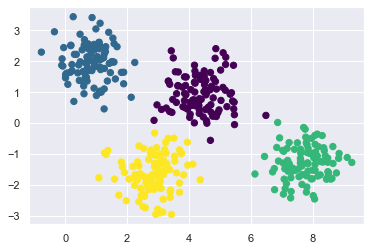

In [31]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)